### Profitable Algorithmic Trading

In [3]:
# Import the required libraries
import pandas as pd
import numpy as np
from pathlib import Path

In [4]:
# Read the vnq.csv file from the Resources folder into a Pandas DataFrame
# Set the `Date` column as the DateTimeIndex
trading_df = pd.read_csv(
    Path("Resources/NASDQ 100 Tickers (7.25)/AAPL.csv"), 
    index_col="Date",
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
trading_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-27,93.709999,94.904999,93.480003,94.809998,93.640457,121214000
2020-07-28,94.367500,94.550003,93.247498,93.252502,92.102150,103625600
2020-07-29,93.750000,95.230003,93.712502,95.040001,93.867607,90329200
2020-07-30,94.187500,96.297501,93.767502,96.190002,95.003426,158130000
2020-07-31,102.885002,106.415001,100.824997,106.260002,104.949219,374336800


In [5]:
# Create a DataFrame filtering only the index and Close columns
signals_df = trading_df.loc[:,["Close"]]

# Review the DataFrame
signals_df.head()

,Close
Date,
2020-07-27,94.809998
2020-07-28,93.252502
2020-07-29,95.040001
2020-07-30,96.190002
2020-07-31,106.260002



Bad key savefig.frameon in file C:\Users\John\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\John\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\John\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an 

<AxesSubplot:xlabel='Date'>

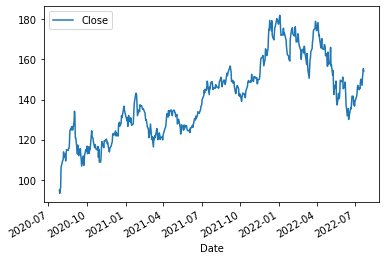

In [6]:
signals_df.plot()

### Trading Algorithm Definition

In [7]:
# Initialize trade_type column for buys and sells
signals_df['trade_type'] = np.nan

# Initialize variable to hold the previous_price
previous_price = 0


# Initialize a cost/proceeds column for recording trade metrics
signals_df["cost/proceeds"] = np.nan

# Initialize share_size equals 100 and accumulated_shares equals 0
share_size = 100
accumulated_shares = 0

In [12]:
# Loop through the Pandas DataFrame and code the conditions of the trading strategy 
for index, row in signals_df.iterrows():
    
    # buy if the previous price is 0, in other words, buy on the first day
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
    if previous_price == 0:
        signals_df.loc[index, "trade_type"] = "buy"
        signals_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)
        accumulated_shares += share_size

    # buy if the current day price is less than the previous day price
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
    elif row["Close"] < previous_price:
        signals_df.loc[index, "trade_type"] = "buy"
        signals_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)
        accumulated_shares += share_size
    
    # sell if the current day price is greater than the previous day price
    elif row["Close"] > previous_price:
        signals_df.loc[index, "trade_type"] = "sell"

    # else hold if the current day price is equal to the previous day price
    else:
        signals_df.loc[index, "trade_type"] = "hold"
    
    # set the previous_price variable to the close price of the current row
    previous_price = row["Close"]
    
    # if the index is the last index of the Dataframe, sell
    # set the cost/proceeds column equal to the row close price multiplied 
    # by the accumulated_shares
    if index == signals_df.index[-1]:
        signals_df.loc[index, "trade_type"] = "sell"
        signals_df.loc[index, "cost/proceeds"] = row["Close"] * accumulated_shares


### Profitability Assessment

In [13]:
signals_df

,Close,trade_type,cost/proceeds
Date,,,
2020-07-27,94.809998,hold,-9.481000e+03
2020-07-28,93.252502,buy,-9.325250e+03
2020-07-29,95.040001,sell,NaN
2020-07-30,96.190002,sell,NaN
2020-07-31,106.260002,sell,NaN
...,...,...,...
2022-07-18,147.070007,buy,-1.470700e+04
2022-07-19,151.000000,sell,NaN
2022-07-20,153.039993,sell,NaN


In [14]:
# Calculate the total profit/loss for 100 share size orders
total_profit_loss = round(signals_df["cost/proceeds"].sum(), 2)

# Print the profit/loss metrics
print(f"The total profit/loss of the trading strategy is ${total_profit_loss}.")

The total profit/loss of the trading strategy is $358493.15.


In [15]:
# Initialize the variable to hold the value of the invested capital
invested_capital = 0

In [17]:
# Calculate the invested capital by adding the cost of all buy trades
for index, row in signals_df.iterrows():
    if row["trade_type"] == "buy":
        invested_capital = invested_capital + row["cost/proceeds"]

In [18]:
# Calculate the return on investment (ROI)
roi = round((total_profit_loss / -(invested_capital)) * 100, 2)
         
# Print the ROI
print(f"The trading algorithm resulted in a return on investment of {roi}%")

The trading algorithm resulted in a return on investment of 10.82%
